In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [9]:
data = pd.read_csv("bank.csv")  

In [26]:
data = data.fillna(data.mean())
data = pd.get_dummies(data) 

print(data.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')


In [27]:
X = data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
y = data['y_yes']

In [28]:
# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# Predicting
y_pred = clf.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       807
           1       0.36      0.38      0.37        98

    accuracy                           0.86       905
   macro avg       0.64      0.65      0.64       905
weighted avg       0.86      0.86      0.86       905



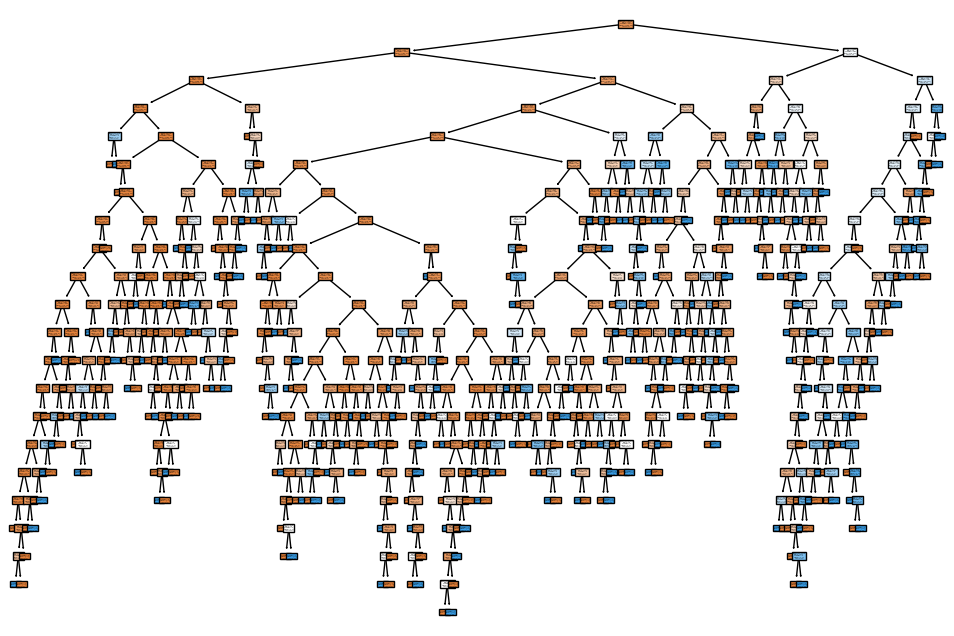

In [32]:
# Visualization
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [33]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

    Feature  Importance
3  duration    0.322254
1   balance    0.211819
0       age    0.140338
2       day    0.127061
5     pdays    0.125527
4  campaign    0.048684
6  previous    0.024318


In [34]:
param_grid = {'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [35]:
best_params = grid_search.best_params_
clf = DecisionTreeClassifier(**best_params)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

In [36]:
y_pred = clf.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       807
           1       0.53      0.34      0.41        98

    accuracy                           0.90       905
   macro avg       0.73      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905



In [38]:
clf_tuned = DecisionTreeClassifier(**best_params)
clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)
print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       807
           1       0.54      0.35      0.42        98

    accuracy                           0.90       905
   macro avg       0.73      0.66      0.68       905
weighted avg       0.88      0.90      0.89       905



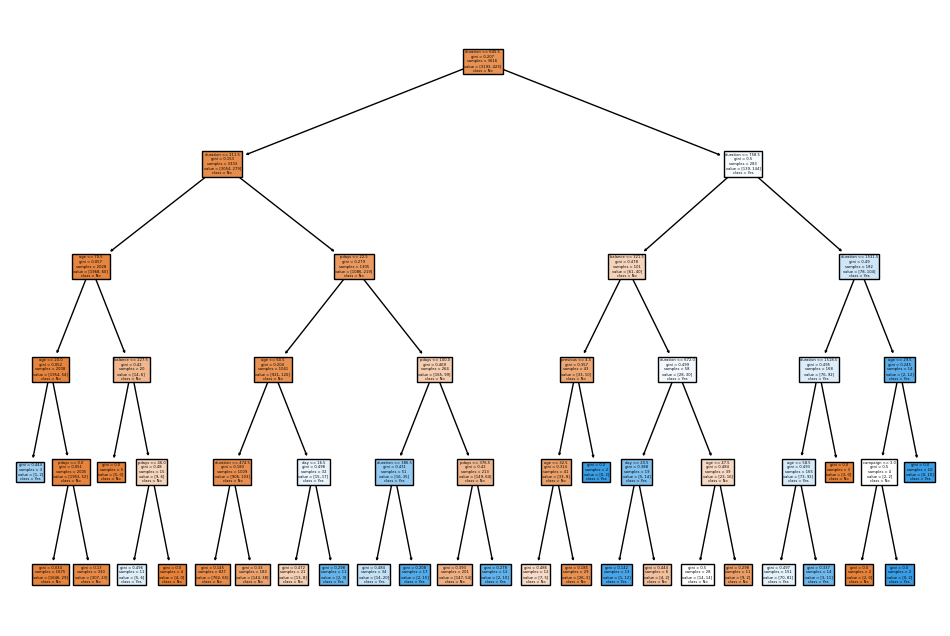

In [39]:
plt.figure(figsize=(12, 8))
plt.title("Decision Tree")
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()